# Convolutional Neural Networks - Deep Learning and Neural Networks with Python and Pytorch p.5

Now that we've learned about the basic feed forward, fully connected, neural network, it's time to cover a new one: the convolutional neural network, often referred to as a convnet or cnn.

Convolutional neural networks got their start by working with imagery. The idea of doing image analysis is to recognize things like objects, such as humans, or cars.

In order to recognize a car or a human, it's fairly challenging to do so if you're thinking of things 1 pixel at a time. Instead, a convolutional neural network aims to use a sliding window (a kernel) that takes into account a group of pixels, to hopefully recognize small features like "edges" or "curves" and then another layer might take combinations of edges or curves to detect shapes like squares or circles, or other complex types of shapes...and so on.

I will illustrate this process, starting with a picture of a cat

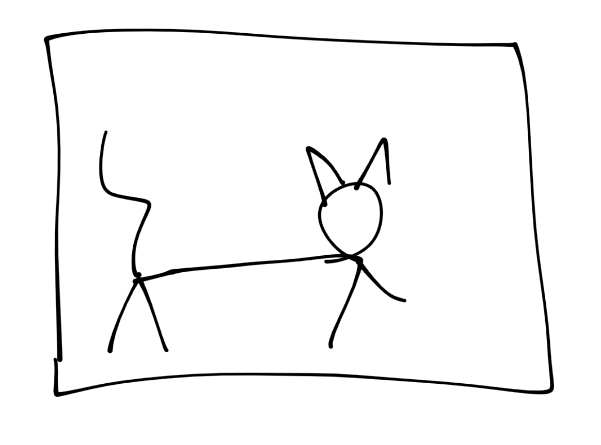

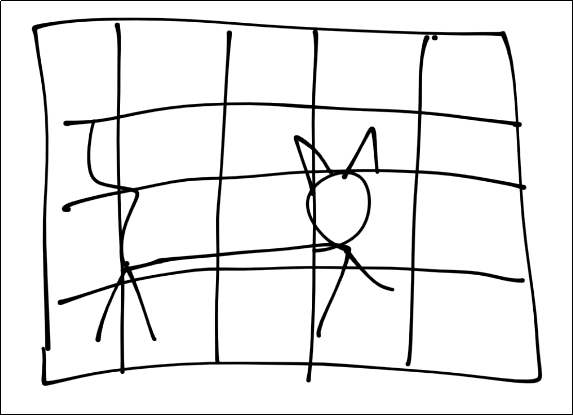

For the purposes of this tutorial, assume each square is a pixel. Next, for the convolution step, we're going to take some n-sized window:

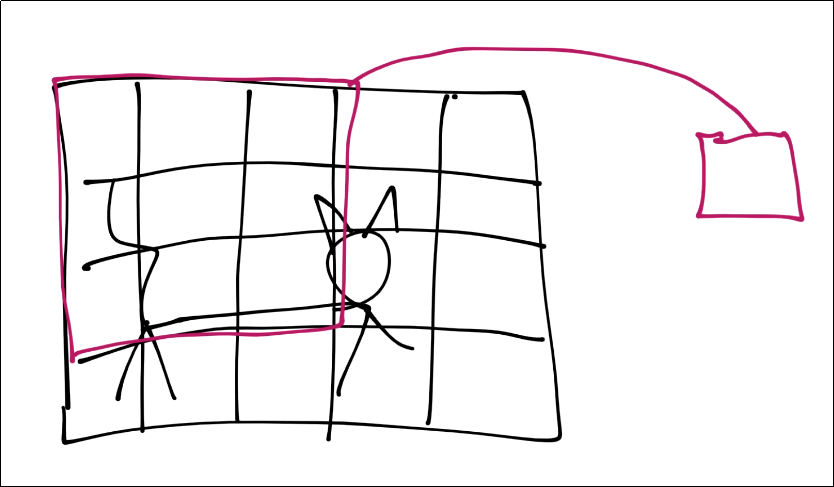

Those features are then condensed down into a single feature in a new featuremap.

Next, we slide that window over and repeat until with have a new set of featuremaps.

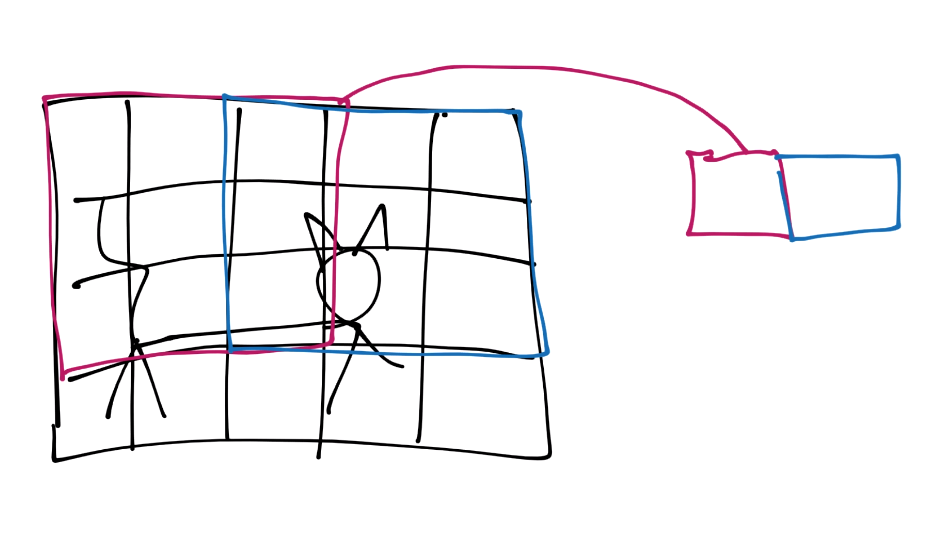

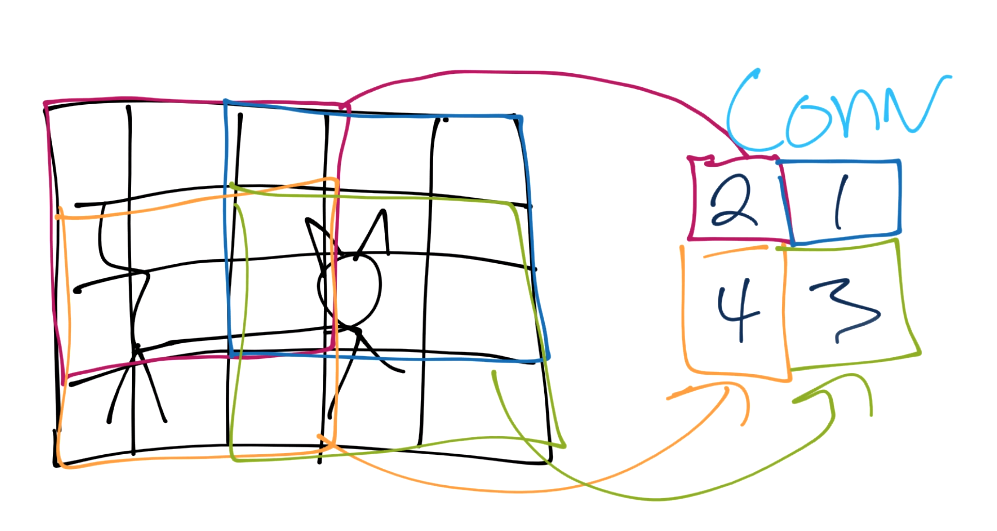

From here, we do pooling. Let's say our convolution gave us (I forgot to put a number in the 2nd row's most right square, assume it's a 3 or less):

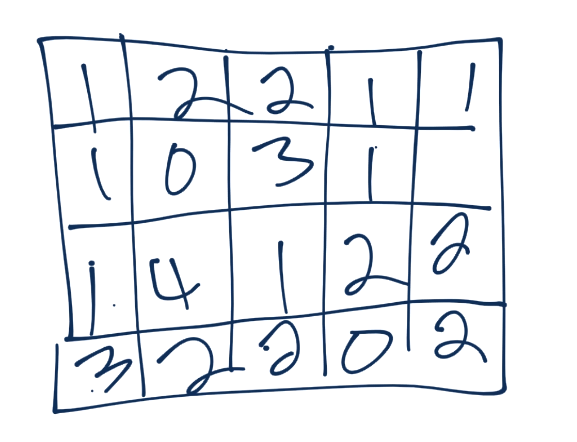

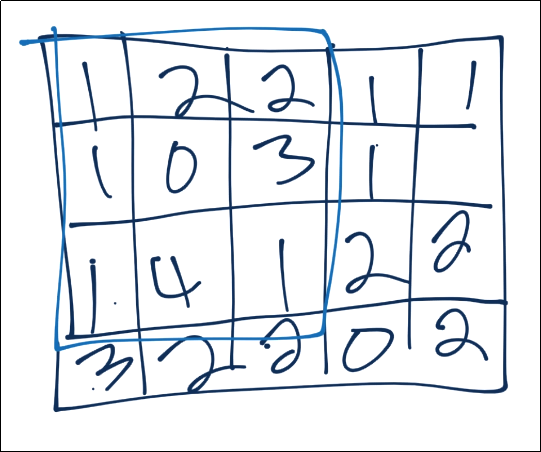

The most common form of pooling is "max pooling," where we simple take the maximum value in the window, and that becomes the new value for that region.

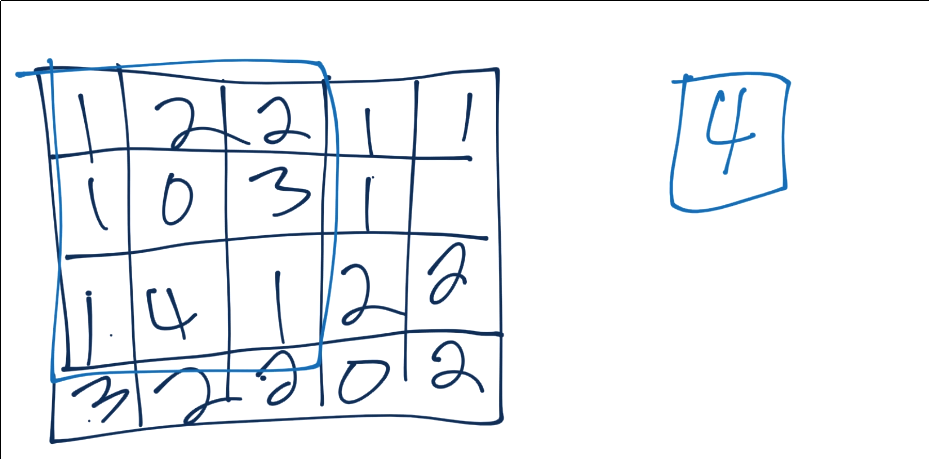

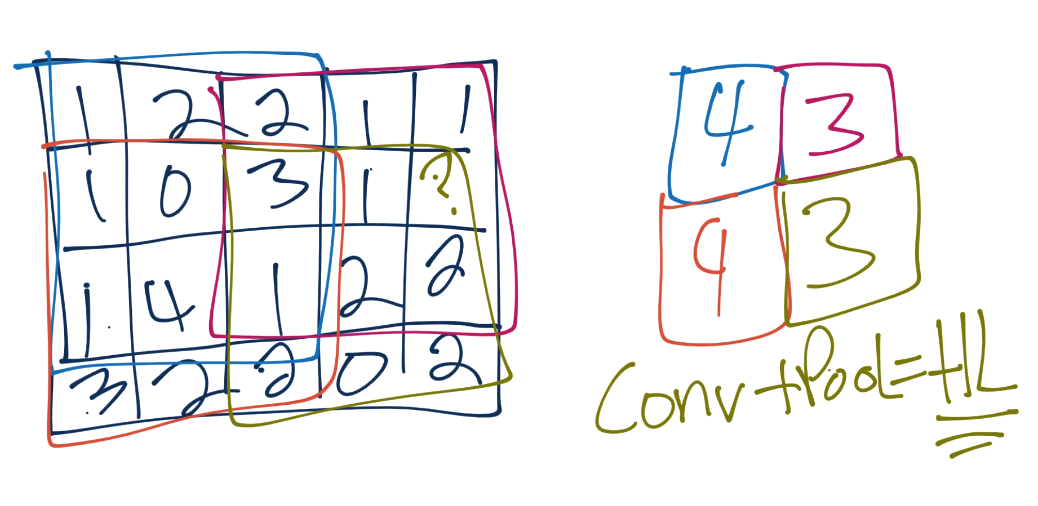

Often, after convolutional layers, we'll have 1 or a few fully connected layers, and then the output. You could go straight from the final pooling to an output layer, however.

So, at their core, convnets are hunting first for low level types of features like lines and curves, then they look for combinations of those, and so on, to better understand what they're looking at.

Let's try our hands at a convnet example.

# Getting data
To begin, we need a dataset.

I am going to have us use the Cats vs Dogs dataset.

This dataset consists of a bunch of images of cats and dogs. Different breeds, ages, sizes (both the animal and the image)..etc.

Once you have downloaded the dataset, you need to extract it. I would just extract it to the directory that you're working in.

# Preparing data
Rember how before I said using torchvision was cheating? Well it was, and now we have to build this data ourselves! To begin, let's make sure you have all of the required libraries:

pip install opencv-python numpy tqdm matplotlib

Let's make some imports:

In [1]:
import os
import cv2
import numpy as np
from tqdm import tqdm
# Now to begin our data processing class:

class DogsVSCats():
    IMG_SIZE = 50
    CATS = "PetImages/Cat"
    DOGS = "PetImages/Dog"
    TESTING = "PetImages/Testing"
    LABELS = {CATS: 0, DOGS: 1}
    training_data = []

The IMG_SIZE is whatever we want, but we have to pick something. The images in the training data are all varying sizes and shapes. We're going to normalize all of the images by reshaping them to all be the same size. I will go with 50x50.

Next are just some variables that hold where the directories with the data are. Once extracted, you wind up with 2 directories. One is Cat, the other is Dog and those contain a bunch of images.

We want to iterate through these two directories, grab the images, resize, scale, convert the class to number (cats = 0, dogs = 1), and add them to our training_data.

Continuing along in our class, let's make a new method called make_training_data:

In [2]:
class DogsVSCats():
    IMG_SIZE = 50
    CATS = "PetImages/Cat"
    DOGS = "PetImages/Dog"
    TESTING = "PetImages/Testing"
    LABELS = {CATS: 0, DOGS: 1}
    training_data = []

    def make_training_data(self):
        for label in self.LABELS:
            for f in tqdm(os.listdir(label)):
                if "jpg" in f:
                    try:
                        pass
                    except Exception as e:
                        pass
                        #print(label, f, str(e))

All we're doing so far is iterating through the cats and dogs directories, and looking through all of the images. Now let's actually write the code to handle for the images:

In [3]:
class DogsVSCats():
    IMG_SIZE = 50
    CATS = "PetImages/Cat"
    DOGS = "PetImages/Dog"
    TESTING = "PetImages/Testing"
    LABELS = {CATS: 0, DOGS: 1}
    training_data = []

    def make_training_data(self):
        for label in self.LABELS:
            for f in tqdm(os.listdir(label)):
                if "jpg" in f:
                    try:
                        path = os.path.join(label, f)
                        img = cv2.imread(path, cv2.IMREAD_GRAYSCALE)
                        img = cv2.resize(img, (self.IMG_SIZE, self.IMG_SIZE))
                        self.training_data.append([np.array(img), np.eye(2)[self.LABELS[label]]])  # do something like print(np.eye(2)[1]), just makes one_hot 
                        #print(np.eye(2)[self.LABELS[label]])
                    except Exception as e:
                        pass
                        #print(label, f, str(e))

We read in the data, convert to grayscale, resize the image to whatever we chose, and then append the image data along with the associated class in number form to our training_data. Some images can't be read, so we just pass on the exception. If you're creating no data at all, then go ahead and print out the error, but it's enough images to be annoying if I print out the error every time.

Once we have the data, is there anything we've not done to the data yet?

We want to check for balance, and we want to shuffle it. We can just use a counter again to see balance:

                        if label == self.CATS:
                            self.catcount += 1
                        elif label == self.DOGS:
                            self.dogcount += 1
Then we can just shuffle the training_data list at the end with

np.random.shuffle(self.training_data)
This process can take a while, longer than we'd like if we're just tinkering with different values for our neural network. It'd be nice to just save where we are now after pre-processing, so we'll also add a np.save.

Finally, I would just recommend using some sort of flag or something for if/when you change something like image shape or something like that, so you can easily re-run this code when needed.

Now our full code is:

In [5]:
!wget https://download.microsoft.com/download/3/E/1/3E1C3F21-ECDB-4869-8368-6DEBA77B919F/kagglecatsanddogs_3367a.zip
!sudo apt-get install unzip
!unzip kagglecatsanddogs_3367a.zip
!pip3 install jupyterlab

Streaming output truncated to the last 5000 lines.
  inflating: PetImages/Dog/5584.jpg  
  inflating: PetImages/Dog/5585.jpg  
  inflating: PetImages/Dog/5586.jpg  
  inflating: PetImages/Dog/5587.jpg  
  inflating: PetImages/Dog/5588.jpg  
  inflating: PetImages/Dog/5589.jpg  
  inflating: PetImages/Dog/559.jpg   
  inflating: PetImages/Dog/5590.jpg  
  inflating: PetImages/Dog/5591.jpg  
  inflating: PetImages/Dog/5592.jpg  
  inflating: PetImages/Dog/5593.jpg  
  inflating: PetImages/Dog/5594.jpg  
  inflating: PetImages/Dog/5595.jpg  
  inflating: PetImages/Dog/5596.jpg  
  inflating: PetImages/Dog/5597.jpg  
  inflating: PetImages/Dog/5598.jpg  
  inflating: PetImages/Dog/5599.jpg  
  inflating: PetImages/Dog/56.jpg    
  inflating: PetImages/Dog/560.jpg   
  inflating: PetImages/Dog/5600.jpg  
  inflating: PetImages/Dog/5601.jpg  
  inflating: PetImages/Dog/5602.jpg  
  inflating: PetImages/Dog/5603.jpg  
 extracting: PetImages/Dog/5604.jpg  
  inflating: PetImages/Dog/5605.jpg  

In [6]:
REBUILD_DATA = True # set to true to one once, then back to false unless you want to change something in your training data.

class DogsVSCats():
    IMG_SIZE = 50
    CATS = "PetImages/Cat"
    DOGS = "PetImages/Dog"
    TESTING = "PetImages/Testing"
    LABELS = {CATS: 0, DOGS: 1}
    training_data = []

    catcount = 0
    dogcount = 0

    def make_training_data(self):
        for label in self.LABELS:
            print(label)
            for f in tqdm(os.listdir(label)):
                if "jpg" in f:
                    try:
                        path = os.path.join(label, f)
                        img = cv2.imread(path, cv2.IMREAD_GRAYSCALE)
                        img = cv2.resize(img, (self.IMG_SIZE, self.IMG_SIZE))
                        self.training_data.append([np.array(img), np.eye(2)[self.LABELS[label]]])  # do something like print(np.eye(2)[1]), just makes one_hot 
                        #print(np.eye(2)[self.LABELS[label]])

                        if label == self.CATS:
                            self.catcount += 1
                        elif label == self.DOGS:
                            self.dogcount += 1

                    except Exception as e:
                        pass
                        #print(label, f, str(e))

        np.random.shuffle(self.training_data)
        np.save("training_data.npy", self.training_data)
        print('Cats:',dogsvcats.catcount)
        print('Dogs:',dogsvcats.dogcount)

if REBUILD_DATA:
    dogsvcats = DogsVSCats()
    dogsvcats.make_training_data()

PetImages/Cat


100%|██████████| 12501/12501 [00:22<00:00, 545.51it/s]


PetImages/Dog


100%|██████████| 12501/12501 [00:19<00:00, 656.04it/s]
/usr/local/lib/python3.7/dist-packages/numpy/core/_asarray.py:136: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray
  return array(a, dtype, copy=False, order=order, subok=True)


Cats: 12476
Dogs: 12470


In [11]:
# After you've built the data once, you should have the training_data.npy file. To use that, we just need to do:

training_data = np.load("training_data.npy", allow_pickle=True)
print(len(training_data))

24946


In [10]:
# Now we can split our training data into X and y, as well as convert it to a tensor:

import torch

X = torch.Tensor([i[0] for i in training_data]).view(-1,50,50)
X = X/255.0
y = torch.Tensor([i[1] for i in training_data])

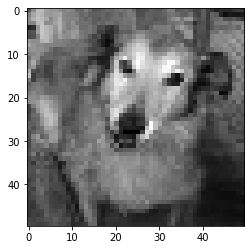

In [9]:
# Now let's take a peak at one of our samples:

import matplotlib.pyplot as plt

plt.imshow(X[0], cmap="gray")

In [8]:
print(y[0])
# Alright! So now we have our training data in the form of inputs and outputs.

tensor([0., 1.])
